<a href="https://colab.research.google.com/github/sezinbiner/ClassificationOfCovidXray/blob/main/sparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/gdrive/MyDrive/bitirme dataset/train"
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
validation_dir = "/content/gdrive/MyDrive/bitirme dataset/validation"
class_names = ['covid', 'normal']
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [44]:
def extract_features(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, 7,7,512))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [10]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
import numpy as np

extraction_layer = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
train_features, train_labels = extract_features(4800, train_generator, 20)
validation_features, validation_labels = extract_features(1200, validation_generator, 20)

loop
loop over
loop


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-be219c129c2a>", line 2, in <module>
    validation_features, validation_labels = extract_features(1200, validation_generator, 20)
  File "<ipython-input-9-0932efe657f7>", line 6, in extract_features
    for inputs_batch, labels_batch in generator:
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/iterator.py", line 104, in __next__
    return self.next(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/iterator.py", line 116, in next
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)
  File "/usr/local/lib/python3.7/dist-pac

KeyboardInterrupt: ignored

In [13]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [14]:
history = model.fit(train_features, train_labels,
                    epochs=3,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

Epoch 1/3
300/300 [==============================] - 22s 20ms/step - loss: 0.7271 - accuracy: 0.9649 - val_loss: 0.4316 - val_accuracy: 0.9758
Epoch 2/3
300/300 [==============================] - 5s 18ms/step - loss: 0.3678 - accuracy: 0.9867 - val_loss: 0.3803 - val_accuracy: 0.9158
Epoch 3/3
300/300 [==============================] - 6s 20ms/step - loss: 0.1603 - accuracy: 0.9864 - val_loss: 0.0959 - val_accuracy: 0.9875


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (16, 25088)               0         
_________________________________________________________________
dense (Dense)                (16, 128)                 3211392   
_________________________________________________________________
dropout (Dropout)            (16, 128)                 0         
_________________________________________________________________
dense_1 (Dense)              (16, 1)                   129       
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________


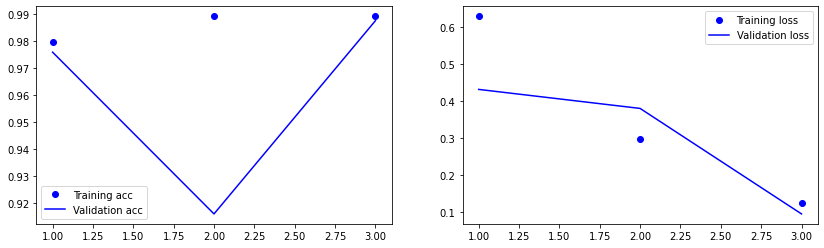

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [42]:
import tensorflow as tf
y_pred=model.predict(validation_features)
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, y_pred)

ValueError: ignored

In [ ]:
test_features, test_labels = extract_features(1232, test_generator, 1)

loop


In [38]:
test = list(test_labels)

In [40]:
test.count(0)

1128

In [33]:
np.where(test_labels == 1)

(array([  2,   7,   9,  10,  14,  19,  20,  21,  22,  24,  26,  28,  30,
         33,  34,  35,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         49,  50,  51,  52,  53,  55,  56,  58,  60,  62,  63,  64,  65,
         67,  71,  73,  74,  76,  78,  80,  82,  85,  87,  89,  90,  92,
         93,  95,  97,  98, 100, 101, 102, 104, 106, 107, 108, 109, 111,
        116, 120, 123, 124, 126, 129, 130, 132, 133, 135, 140, 141, 143,
        145, 148, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 163,
        164, 166, 168, 173, 174, 177, 178, 180, 187, 191, 192, 195, 198]),)

In [32]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)

Accuracy: 0.974838
Precision: 0.974838
Recall: 0.974838
F1 score: 0.973943
              precision    recall  f1-score   support

       covid       0.98      0.99      0.99      1128
      normal       0.91      0.78      0.84       104

    accuracy                           0.97      1232
   macro avg       0.94      0.89      0.91      1232
weighted avg       0.97      0.97      0.97      1232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[1120,    8],
       [  23,   81]])